In [1]:
import torch
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

from utils import plot_2d, load_plot_2d, load_model_from_checkpoint, correlation_coefficients
from utils import plot_5d_correlations, print_cc_mean_std
    
from main_save_mcc import train_model, test_model
from lib.metrics import mean_corr_coef as mcc

In [2]:
# ROOT_DIR = (os.path.abspath(''))
MODEL_DIR = "pt_models/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
RESULTS_DIR = "results/"

## Reproduced results on synthetic dataset

## iFlow MCC and  Deep Energy

### To retrain the models for 100 seeds uncomment and run the following cells
#### ! Warning - This takes around 30 minutes per seed on an RTX 2080 !

In [5]:
# Linux
# !scripts/run_iFlow.sh

# Windows
# !scripts/run_iFlow.bat

### Then uncomment and run the following cells to calculate the MCCs and retrieve the energy values.


In [6]:
# Linux
# !scripts/calculate_MCCs.sh

# Windows
# !scripts/run_calculate_MCCs.bat


# read_energy_values_from_tensorboard()

In [3]:
def plot_test_performances():
    """
    Plots the MCC and Deep Energy results of the base dataset for seeds 1 to 60.
    """
    with open(osp.join(RESULTS_DIR, 'eval_performances.txt')) as f:
        performances = list(map(eval, f.readline().split(',')[1:]))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
    fig.tight_layout()

    ax1.plot(performances, '-.', color='gold', label=f'iFlow:{round(np.mean(performances), 4)}({round(np.std(performances), 4)})')
    ax1.legend()
    ax1.set_xlabel('Seed Number')
    ax1.set_ylabel('MCC')

    energy_values = np.load(os.path.join('results', 'energy_values.npy'))

    ax2.plot(energy_values, '-.', color='gold', label=f'iFlow:{round(np.mean(energy_values), 4)}')
    ax2.legend()
    ax2.set_xlabel('Seed Number')
    ax2.set_ylabel('Energy Value')
    plt.show()

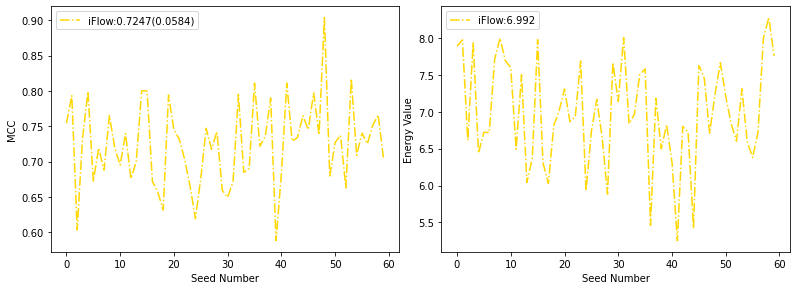

In [4]:
plot_test_performances()

## Visualization of 2D cases (seed 1 to 10)

### To retrain models for this experiment, instead of using the provided checkpoints and results, uncomment and run this cell.

In [8]:
# seeds = range(1, 11)

# # Corresponding dataset arguments for the 2D visualization experiment
# # $seedvar will be overwritten using previously defined seed 
# data_args = '1000_5_2_2_3_$seedvar_gauss_xtanh_u_f'
# epochs = 20
# batch_size = 64

# # Remove old results
# if os.path.exists("results/2D_mcc_scores/iFlow_1000_5_3.txt"):
#     os.remove("results/2D_mcc_scores/iFlow_1000_5_3.txt")
# if os.path.exists("results/2D_mcc_scores/iVAE_1000_5_3.txt"):
#     os.remove("results/2D_mcc_scores/iVAE_1000_5_3.txt")


# for seed in seeds:
#     temp_args = "_".join(["_".join(data_args.split("_")[:5]), str(seed), "_".join(data_args.split("_")[6:])])
    
#     # Must use --save_mcc to log seed performance to .txt file for plotting
#     !python main_save_mcc.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iFlow --cuda --flow_type=RQNSF_AG --nat_param_act=Softplus --preload-gpu
#     !python main_save_mcc.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iVAE --cuda --preload-gpu

#### Number of mixing layers = 3

Number of layers in dataset mixing MLP:  3
iFlow mean = 0.7727, std = 0.0770
len iFlow array: 10
iVAE mean = 0.8176, std = 0.0561
len iVAE array: 10
Dataset seed = 1


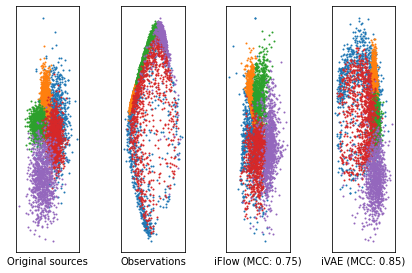

Creating dataset data/1/tcl_1000_5_2_2_3_2_gauss_xtanh_u.npz ...
 ... done
Dataset seed = 2


FileNotFoundError: [Errno 2] No such file or directory: 'z_est/1000_5_2_2_3_2_gauss_xtanh_u_f_20/z_est_iFlow.npy'

In [7]:
# Arguments for the used 2D dataset is the following string: '1000_5_2_2_3_$seed_gauss_xtanh_u_f'
# For plotting, seed argument will automatically be replaced by the correct seed (1-10)

iFlow_file = osp.join('results','2D_mcc_scores/iFlow_1000_5_3.txt').replace("\\","/")
iVAE_file = osp.join('results','2D_mcc_scores/iVAE_1000_5_3.txt').replace("\\","/")

seeds = range(1, 11)
data_args = "1000_5_2_2_3_$seed_gauss_xtanh_u_f"

load_plot_2d(seeds, data_args, mixing_layers = 3, iFlow_results_file=iFlow_file, iVAE_results_file=iVAE_file)

In [10]:
# Manually test a checkpoint's MCC performance
folder_name = '1000_5_2_2_3_1_gauss_xtanh_u_f_iFlow_20'

CKPT_PATH = osp.join(MODEL_DIR, folder_name, '_ckpt_final.pth').replace("\\","/")

model = load_model_from_checkpoint(CKPT_PATH, device=device)

model.eval()
test_model(model, device=device)

checkpoint path: pt_models/1000_5_2_2_3_1_gauss_xtanh_u_f_iFlow_20/_ckpt_final.pth
Loading model iFlow
Loading data data/1/tcl_1000_5_2_2_3_1_gauss_xtanh_u.npz
x.shape == torch.Size([5000, 2])
s.shape == (5000, 2)
u.shape == torch.Size([5000, 5])
{'file': 'data/1/tcl_1000_5_2_2_3_1_gauss_xtanh_u.npz', 'path': 'data/1/tcl_1000_5_2_2_3_1_gauss_xtanh_u.npz', 'batch_size': 64, 'epochs': '20', 'device': device(type='cuda'), 'seed': 1, 'i_what': 'iFlow', 'max_iter': None, 'hidden_dim': 50, 'depth': 3, 'lr': 0.001, 'cuda': True, 'preload': True, 'anneal': False, 'log_freq': 25, 'flow_type': 'RQNSF_AG', 'num_bins': 8, 'nat_param_act': 'Softplus', 'gpu_id': '0', 'flow_length': 10, 'lr_drop_factor': 0.25, 'lr_patience': 10, 'nps': 1000, 'ns': 5, 'n': 5000, 'latent_dim': 2, 'data_dim': 2, 'aux_dim': 5}
x.shape == torch.Size([5000, 2])
s.shape == (5000, 2)
u.shape == torch.Size([5000, 5])
z_est.shape == (5000, 2)
EVAL PERFORMANCE: 0.7467094524090372
DONE.


# Consistency across latent dimensions

# MOET HIER NOG CODE OM DE CORRELATIONS TE KRIJGEN?

iFlow performance on dataset
Dataset seed =  49
MCC =  0.9039


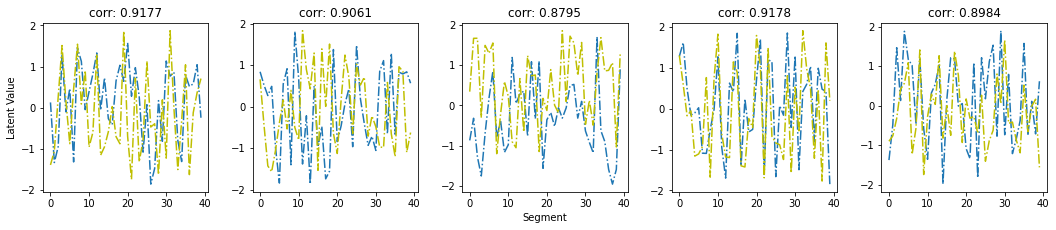

iVAE performance on dataset
Dataset seed =  49
MCC =  0.4297


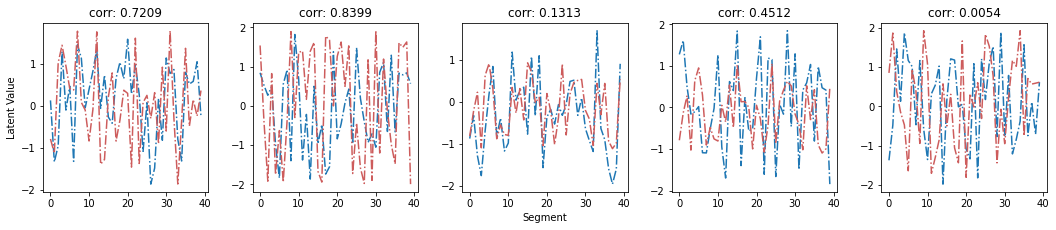

In [11]:
plot_5d_correlations(z_est_dataset_dir='z_est/1000_40_5_5_3_49_gauss_xtanh_u_f_20', show_iFlow=True)

In [12]:
print_cc_mean_std("results/cc_across_dims/iFlow_1000_40_3.txt")

print_cc_mean_std("results/iVAE_correlations/iVAE_1000_40_3.txt")

means:  [0.725  0.7469 0.7076 0.7134 0.7304]
standard deviations:  [0.126  0.1121 0.1225 0.1118 0.1306]
means:  [0.4996 0.4824 0.4569 0.4421 0.5002]
standard deviations:  [0.257  0.259  0.2826 0.2561 0.249 ]


## Extensions: comparison of iFlow and iVAE on increased dataset complexity

### To retrain models for this experiment, instead of using the provided checkpoints and results, uncomment and run this cell.

In [ ]:
# seeds = range(1, 11)

# # Corresponding dataset arguments for the 2D visualization experiment
# # $seedvar will be overwritten using previously defined seed 
# data_args = '1000_5_2_2_4_$seedvar_gauss_xtanh_u_f'
# epochs = 20
# batch_size = 64

# # Remove old results
# if os.path.exists("results/2D_mcc_scores/iFlow_1000_5_3.txt"):
#     os.remove("results/2D_mcc_scores/iFlow_1000_5_3.txt")
# if os.path.exists("results/2D_mcc_scores/iVAE_1000_5_3.txt"):
#     os.remove("results/2D_mcc_scores/iVAE_1000_5_3.txt")


# for seed in seeds:
#     temp_args = "_".join(["_".join(data_args.split("_")[:5]), str(seed), "_".join(data_args.split("_")[6:])])
    
#     # Must use --save_mcc to log seed performance to .txt file for plotting
#     !python main_save_mcc.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iFlow --cuda --flow_type=RQNSF_AG --nat_param_act=Softplus --preload-gpu
#     !python main_save_mcc.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iVAE --cuda --preload-gpu



# seeds = range(1, 11)

# # Corresponding dataset arguments for the 2D visualization experiment
# # $seedvar will be overwritten using previously defined seed 
# data_args = '1000_5_2_2_5_$seedvar_gauss_xtanh_u_f'
# epochs = 20
# batch_size = 64

# # Remove old results
# if os.path.exists("results/2D_mcc_scores/iFlow_1000_5_3.txt"):
#     os.remove("results/2D_mcc_scores/iFlow_1000_5_3.txt")
# if os.path.exists("results/2D_mcc_scores/iVAE_1000_5_3.txt"):
#     os.remove("results/2D_mcc_scores/iVAE_1000_5_3.txt")


# for seed in seeds:
#     temp_args = "_".join(["_".join(data_args.split("_")[:5]), str(seed), "_".join(data_args.split("_")[6:])])
    
#     # Must use --save_mcc to log seed performance to .txt file for plotting
#     !python main_save_mcc.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iFlow --cuda --flow_type=RQNSF_AG --nat_param_act=Softplus --preload-gpu
#     !python main_save_mcc.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iVAE --cuda --preload-gpu

#### Number of mixing layers = 4

In [13]:
iFlow_file = osp.join('results','2D_mcc_scores/iFlow_1000_5_4.txt').replace("\\","/")
iVAE_file = osp.join('results','2D_mcc_scores/iVAE_1000_5_4.txt').replace("\\","/")

seeds = range(1, 11)
data_args = "1000_5_2_2_4_$seed_gauss_xtanh_u_f"

load_plot_2d(seeds, data_args, mixing_layers=4, iFlow_results_file=iFlow_file, iVAE_results_file=iVAE_file)

Number of layers in dataset mixing MLP:  4
iFlow mean = 0.7374, std = 0.1083
len iFlow array: 10
iVAE mean = 0.6874, std = 0.1188
len iVAE array: 10
Dataset seed = 1


FileNotFoundError: [Errno 2] No such file or directory: 'z_est/1000_5_2_2_4_1_gauss_xtanh_u_f_20/z_est_iVAE.npy'

#### Number of mixing layers = 5

In [14]:
# Arguments for the used 2D dataset is the following string: '1000_5_2_2_3_$seed_gauss_xtanh_u_f'
# For plotting, seed argument will automatically be replaced by the correct seed (1-10)

iFlow_file = osp.join('results','2D_mcc_scores/iFlow_1000_5_5.txt').replace("\\","/")
iVAE_file = osp.join('results','2D_mcc_scores/iVAE_1000_5_5.txt').replace("\\","/")

seeds = range(1, 11)
data_args = "1000_5_2_2_5_$seed_gauss_xtanh_u_f"

load_plot_2d(seeds, data_args, mixing_layers=5, iFlow_results_file=iFlow_file, iVAE_results_file=iVAE_file)

Number of layers in dataset mixing MLP:  5
iFlow mean = 0.7332, std = 0.1154
len iFlow array: 10
iVAE mean = 0.6403, std = 0.1458
len iVAE array: 10
Dataset seed = 1


FileNotFoundError: [Errno 2] No such file or directory: 'z_est/1000_5_2_2_5_1_gauss_xtanh_u_f_20/z_est_iVAE.npy'

## Running the experiments

To train and evaluate an iFlow model on the standard dataset using a given seed, the following script can be run. 

% Geef uitleg over arguments zoals in  https://github.com/uva-fact-ai-course/uva-fact-ai-course/blob/master/DL-prototypes/results.ipynb

In [9]:
!python main_save_mcc.py \
        -x 1000_40_5_5_3_1_gauss_xtanh_u_f \
        -i iVAE \
        -ft RQNSF_AG \
        -npa Softplus \
        -fl 10 \
        -lr_df 0.25 \
        -lr_pn 10 \
        -b 64 \
        -e 20 \
        -l 1e-3 \
        -s 1 \
        -u 0 \
        -c

Namespace(anneal=False, batch_size=64, cuda=True, data_args='1000_40_5_5_3_1_gauss_xtanh_u_f', depth=3, epochs=20, file=None, flow_length=10, flow_type='RQNSF_AG', gpu_id='0', hidden_dim=50, i_what='iVAE', latent_dim=None, log_freq=25, lr=0.001, lr_drop_factor=0.25, lr_patience=10, max_iter=None, nat_param_act='Softplus', no_log=False, num_bins=8, preload=False, save_mcc=False, seed=1)
training on GeForce GTX 950M
data loaded on cpu
setup time: 3.0335137844085693s
Beginning training for exp: 1
.. checkpoint at iteration 0 ..
epoch 1: 6.4649s;	loss: 2.7114;	perf: 0.4926
epoch 2: 5.6129s;	loss: 1.6694;	perf: 0.4965
epoch 3: 5.8032s;	loss: 1.1244;	perf: 0.4937
epoch 4: 5.7894s;	loss: 1.0198;	perf: 0.5130
.. checkpoint at iteration 2500 ..
epoch 5: 5.6185s;	loss: 0.8125;	perf: 0.5118
Epoch   138: reducing learning rate of group 0 to 2.5000e-04.
epoch 6: 5.8041s;	loss: 0.6855;	perf: 0.5123
Epoch   157: reducing learning rate of group 0 to 6.2500e-05.
epoch 7: 5.7631s;	loss: 0.6551;	perf: 0.

### Training model for visualization of 2D latent space

In [11]:
seeds = [69]

# $seedvar will be overwritten using previously defined seed 
data_args = '1000_5_2_2_3_$seedvar_gauss_xtanh_u_f'
epochs = 20
batch_size = 64
i_what = 'iFlow' # 'iFlow' or 'iVAE'

for seed in seeds:
    temp_args = "_".join(["_".join(data_args.split("_")[:5]), str(seed), "_".join(data_args.split("_")[6:])])
    # Use -mcc or --save_mcc argument to log (append) seed performance to .txt file
    !python main_save_mcc.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=iFlow --cuda --flow_type=RQNSF_AG --nat_param_act=Softplus --preload-gpu


Namespace(anneal=False, batch_size=64, cuda=True, data_args='1000_5_2_2_3_69_gauss_xtanh_u_f', depth=3, epochs=3, file=None, flow_length=10, flow_type='RQNSF_AG', gpu_id='0', hidden_dim=50, i_what='iFlow', latent_dim=None, log_freq=25, lr=0.001, lr_drop_factor=0.25, lr_patience=10, max_iter=None, nat_param_act='Softplus', no_log=False, num_bins=8, preload=True, save_mcc=True, seed=1)
training on GeForce GTX 950M
data loaded on cuda
{'file': 'data/1/tcl_1000_5_2_2_3_69_gauss_xtanh_u.npz', 'data_args': '1000_5_2_2_3_69_gauss_xtanh_u_f', 'latent_dim': 2, 'batch_size': 64, 'epochs': 3, 'max_iter': None, 'hidden_dim': 50, 'depth': 3, 'lr': 0.001, 'seed': 1, 'cuda': True, 'preload': True, 'anneal': False, 'no_log': False, 'log_freq': 25, 'i_what': 'iFlow', 'flow_type': 'RQNSF_AG', 'num_bins': 8, 'nat_param_act': 'Softplus', 'gpu_id': '0', 'flow_length': 10, 'lr_drop_factor': 0.25, 'lr_patience': 10, 'save_mcc': True, 'device': device(type='cuda'), 'path': 'data/1/tcl_1000_5_2_2_3_69_gauss_xt

In [35]:
# seeds = [69]

# iFlow_file = 
# iVAE_file = 
# load_plot_2d(seeds, data_args, iFlow_results_file=iFlow_file, iVAE_results_file=iVAE_file)

In [3]:
# TEMP DELETE
def correlation_coefficients(x, y, method='pearson'):
    """
    A numpy implementation of the mean correlation coefficient metric.

    :param x: numpy.ndarray
    :param y: numpy.ndarray
    :param method: str, optional
            The method used to compute the correlation coefficients.
                The options are 'pearson' and 'spearman'
                'pearson':
                    use Pearson's correlation coefficient
    :return: float
    """
    d = x.shape[1]
    if method == 'pearson':
        cc = np.corrcoef(x, y, rowvar=False)[:d, d:]
    else:
        raise ValueError('not a valid method: {}'.format(method))
    cc_matrix = np.abs(cc)

    corr_coefs = cc_matrix[linear_sum_assignment(-1 * cc_matrix)] #.mean()
    return corr_coefs

def temp_test_model(model, device, save_mcc=False):
    ###### Run Test Here
    model.eval()

    # Grab data arguments from dataset filename
    model_name = model.__class__.__name__
    if model_name == 'iFlow':
        data_args = model.args['file'].split('/')[-1][4:-4] + '_f'
        seed = model.args['seed']
        epochs = model.args['epochs']
    elif model_name == 'iVAE':
        data_args = model.file.split('/')[-1][4:-4] + '_f'
        seed = model.seed
        epochs = model.epochs


    data_file = create_if_not_exist_dataset(root='data/{}/'.format(seed), arg_str=data_args)
    A = np.load(data_file)

    x = A['x']  # of shape
    x = torch.from_numpy(x).to(device)
    print("x.shape ==", x.shape)

    s = A['s']  # of shape
    # s = torch.from_numpy(s).to(device)
    print("s.shape ==", s.shape)

    u = A['u']  # of shape
    u = torch.from_numpy(u).to(device)
    print("u.shape ==", u.shape)

    if model_name == 'iVAE':
        _, z_est = model.elbo(x, u)
    elif model_name == 'iFlow':
        # (_, _, _), z_est = model.neg_log_likelihood(x, u)
        total_num_examples = reduce(operator.mul, map(int, data_args.split('_')[:2]))
        model.set_mask(total_num_examples)
        z_est, nat_params = model.inference(x, u)

    z_est = z_est.cpu().detach().numpy()


    Z_EST_FOLDER = osp.join('z_est/', data_args + '_' + str(epochs))

    if not osp.exists(Z_EST_FOLDER):
        os.makedirs(Z_EST_FOLDER)
    np.save("{}/z_est_{}.npy".format(Z_EST_FOLDER, model_name), z_est)
    if model_name == 'iFlow':
        nat_params = nat_params.cpu().detach().numpy()
        np.save("{}/nat_params.npy".format(Z_EST_FOLDER), nat_params)
    print("z_est.shape ==", z_est.shape)

    corr_coefs = correlation_coefficients(s, z_est)

    if save_mcc:
        # Writes results for current model, flow type and n layers in mixing MLP
        # Saved as i-what_nsource_nlayers_flowlength_prior.txt
        split_args = data_args.split("_")
        if model_name == 'iVAE':
            with open(osp.join('results', 'iVAE_correlations', "_".join([model_name, "_".join(split_args[:2]), split_args[4]]) + '.txt'), 'a+') as f:
                # with open(osp.join('results', "_".join([args.i_what, "_".join(args.data_args.split("_")[:2]),
                #                                         args.data_args.split("_")[4], args.data_args.split("_")[6]]) + '.txt'), 'a+') as f:
                f.write(";" + str(corr_coefs))
        elif model_name == 'iFlow':
            with open(osp.join('results', 'iVAE_correlations', "_".join([model_name, "_".join(split_args[:2]), split_args[4]]) + '.txt'), 'a+') as f:
                # with open(osp.join('results', "_".join([args.i_what, "_".join(args.data_args.split("_")[:2]),
                #                                         args.data_args.split("_")[4],
                #                                         args.data_args.split("_")[6]]) + '.txt'), 'a+') as f:
                f.write(";" + str(corr_coefs))
            

    print("DONE.")

In [11]:
# Remove

from lib.data import SyntheticDataset, DataLoaderGPU, create_if_not_exist_dataset
from scipy.optimize import linear_sum_assignment

if not osp.exists('results/iVAE_correlations/iVAE_1000_40_3.txt'):
    with open('results/iVAE_correlations/iVAE_1000_40_3.txt', 'w') as fp: 
        pass
    
seeds = range(1, 58)
# # $seedvar will be overwritten using previously defined seed 
# # data_args = '1000_40_5_5_3_$seedvar_gauss_xtanh_u_f'
# epochs = 20
# batch_size = 64
# i_what = 'iVAE' # 'iFlow' or 'iVAE'

# for seed in seeds:
#     temp_args = "_".join(["_".join(data_args.split("_")[:5]), str(seed), "_".join(data_args.split("_")[6:])])
#     # Use -mcc or --save_mcc argument to log (append) seed performance to .txt file
#     !python calculate_iVAE_correlations.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=$i_what --cuda --flow_type=RQNSF_AG --nat_param_act=Softplus --preload-gpu

# Manually test a checkpoint's MCC performance
for seed in seeds:
    folder_name = '1000_40_5_5_3_$seedvar_gauss_xtanh_u_f_iVAE_20'
    folder_name = "_".join(folder_name.split("_")[:5] + [str(seed)] + folder_name.split("_")[6:])

    CKPT_PATH = osp.join(MODEL_DIR, folder_name, '_ckpt_final.pth').replace("\\","/")

    model = load_model_from_checkpoint(CKPT_PATH, device=device)

    model.eval()
    temp_test_model(model, device=device, save_mcc=True)

checkpoint path: pt_models/1000_40_5_5_3_1_gauss_xtanh_u_f_iVAE_20/_ckpt_final.pth
Loading model iVAE
Loading data data/1/tcl_1000_40_5_5_3_1_gauss_xtanh_u.npz
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.shape == torch.Size([40000, 40])
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.shape == torch.Size([40000, 40])
z_est.shape == (40000, 5)
DONE.
checkpoint path: pt_models/1000_40_5_5_3_2_gauss_xtanh_u_f_iVAE_20/_ckpt_final.pth
Loading model iVAE
Loading data data/1/tcl_1000_40_5_5_3_2_gauss_xtanh_u.npz
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.shape == torch.Size([40000, 40])
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.shape == torch.Size([40000, 40])
z_est.shape == (40000, 5)
DONE.
checkpoint path: pt_models/1000_40_5_5_3_3_gauss_xtanh_u_f_iVAE_20/_ckpt_final.pth
Loading model iVAE
Loading data data/1/tcl_1000_40_5_5_3_3_gauss_xtanh_u.npz
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.shape == torch.Size([40000, 40])
x

z_est.shape == (40000, 5)
DONE.
checkpoint path: pt_models/1000_40_5_5_3_23_gauss_xtanh_u_f_iVAE_20/_ckpt_final.pth
Loading model iVAE
Loading data data/1/tcl_1000_40_5_5_3_23_gauss_xtanh_u.npz
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.shape == torch.Size([40000, 40])
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.shape == torch.Size([40000, 40])
z_est.shape == (40000, 5)
DONE.
checkpoint path: pt_models/1000_40_5_5_3_24_gauss_xtanh_u_f_iVAE_20/_ckpt_final.pth
Loading model iVAE
Loading data data/1/tcl_1000_40_5_5_3_24_gauss_xtanh_u.npz
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.shape == torch.Size([40000, 40])
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.shape == torch.Size([40000, 40])
z_est.shape == (40000, 5)
DONE.
checkpoint path: pt_models/1000_40_5_5_3_25_gauss_xtanh_u_f_iVAE_20/_ckpt_final.pth
Loading model iVAE
Loading data data/1/tcl_1000_40_5_5_3_25_gauss_xtanh_u.npz
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5

x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.shape == torch.Size([40000, 40])
z_est.shape == (40000, 5)
DONE.
checkpoint path: pt_models/1000_40_5_5_3_46_gauss_xtanh_u_f_iVAE_20/_ckpt_final.pth
Loading model iVAE
Loading data data/1/tcl_1000_40_5_5_3_46_gauss_xtanh_u.npz
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.shape == torch.Size([40000, 40])
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.shape == torch.Size([40000, 40])
z_est.shape == (40000, 5)
DONE.
checkpoint path: pt_models/1000_40_5_5_3_47_gauss_xtanh_u_f_iVAE_20/_ckpt_final.pth
Loading model iVAE
Loading data data/1/tcl_1000_40_5_5_3_47_gauss_xtanh_u.npz
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.shape == torch.Size([40000, 40])
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.shape == torch.Size([40000, 40])
z_est.shape == (40000, 5)
DONE.
checkpoint path: pt_models/1000_40_5_5_3_48_gauss_xtanh_u_f_iVAE_20/_ckpt_final.pth
Loading model iVAE
Loading data data/1/tc

### Script to generate iVAE correlation coefficients for seeds 1-60 on original dataset

In [9]:
# seeds = range(1, 61)
# # $seedvar will be overwritten using previously defined seed 
# data_args = '1000_40_5_5_3_$seedvar_gauss_xtanh_u_f'
# epochs = 20
# batch_size = 64
# i_what = 'iVAE' # 'iFlow' or 'iVAE'

# for seed in seeds:
#     temp_args = "_".join(["_".join(data_args.split("_")[:5]), str(seed), "_".join(data_args.split("_")[6:])])
#     # Use -mcc or --save_mcc argument to log (append) seed performance to .txt file
#     !python calculate_iVAE_correlations.py --save_mcc --data-args=$temp_args -e=$epochs --batch-size=$batch_size --i-what=$i_what --cuda --flow_type=RQNSF_AG --nat_param_act=Softplus --preload-gpu


Namespace(anneal=False, batch_size=64, cuda=True, data_args='1000_40_5_5_3_1_gauss_xtanh_u_f', depth=3, epochs=20, file=None, flow_length=10, flow_type='RQNSF_AG', gpu_id='0', hidden_dim=50, i_what='iVAE', latent_dim=None, log_freq=25, lr=0.001, lr_drop_factor=0.25, lr_patience=10, max_iter=None, nat_param_act='Softplus', no_log=False, num_bins=8, preload=True, save_mcc=True, seed=1)
training on GeForce GTX 950M
data loaded on cuda
setup time: 3.104574203491211s
Beginning training for exp: 1
.. checkpoint at iteration 0 ..
^C
Traceback (most recent call last):
  File "calculate_iVAE_correlations.py", line 361, in <module>
    model = train_model(args, metadata, device=device)
  File "calculate_iVAE_correlations.py", line 139, in train_model
    elbo, z_est = model.elbo(x, u)  # elbo is a scalar loss while z_est is of shape [64, 2]
  File "/home/feng/Desktop/iFlow/lib/models.py", line 300, in elbo
    log_pz_u = self.prior_dist.log_pdf(z, *prior_params) # log p(z|u)
  File "/home/feng/D

UnboundLocalError: local variable 'child' referenced before assignment